# Creating a Symptom Classifier
Title: MLX (Machine Learning Xtreme) Hackathon - Code, Train, Deploy!


Author: Moses Wanjema

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from NaiveBayes import NaiveBayesClassifier
import joblib


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rcParams['figure.dpi'] = 200

In [2]:
train_data = pd.read_csv('data/Training.csv')
train_data.head()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS


In [3]:
test_data = pd.read_csv('data/Testing.csv')
test_data.head()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Acne
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Alcoholic hepatitis
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Allergy
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Arthritis


In [4]:
def prediction_confidence(pred_proba_mat):
    return 1 + np.sum(pred_proba_mat * np.log(pred_proba_mat), axis=1)/np.log(pred_proba_mat.shape[1])

## Naive Bayes Classifier (written by Me!)

In [5]:
X_train = train_data.drop('prognosis', axis=1)
Y_train = train_data.prognosis
X_test = test_data.drop('prognosis', axis=1)
Y_test = test_data.prognosis

nb = NaiveBayesClassifier(alpha=1)
nb.fit(X_train, Y_train)
print(f'Train Accuracy: {nb.score(X_train, Y_train)}')
print(f'Test Accuracy: {nb.score(X_test, Y_test)}')

C:\Users\NRT User\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\NRT User\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\NRT User\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=ou

Train Accuracy: 0.9934640522875817
Test Accuracy: 0.9523809523809523


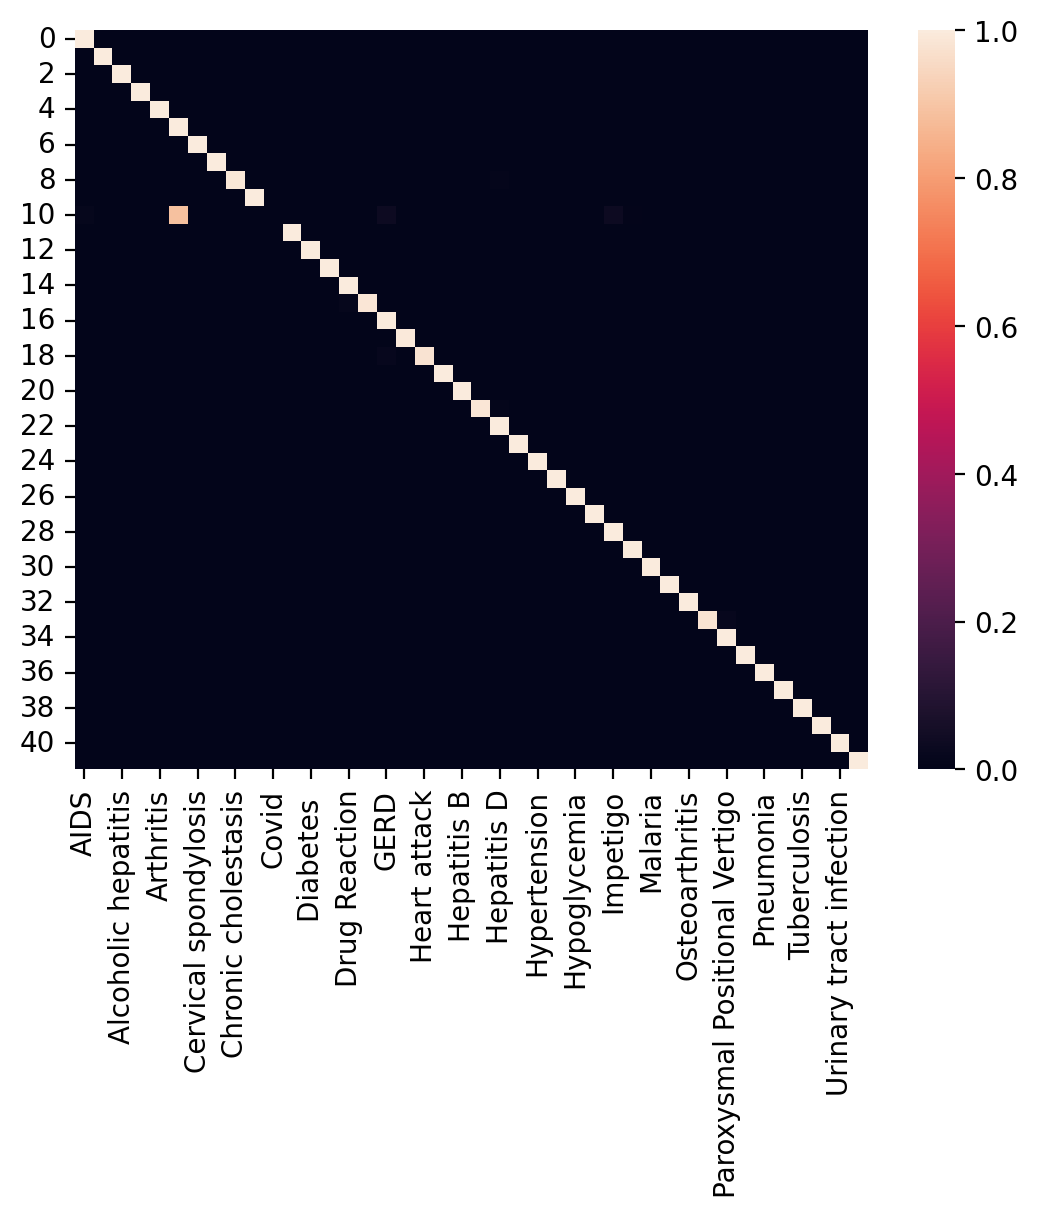

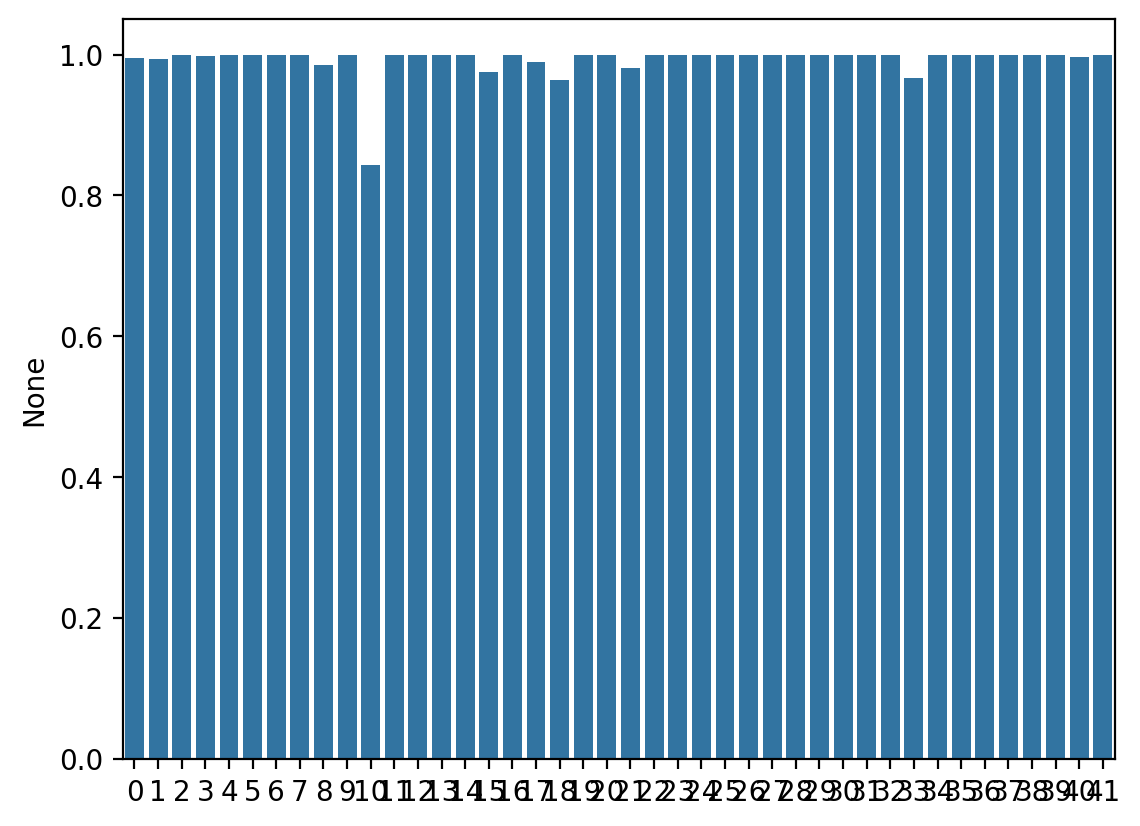

In [6]:
pred_proba = nb.predict_proba(X_test)
sns.heatmap(pred_proba)
plt.show()
sns.barplot(x=np.arange(X_test.shape[0]), y=prediction_confidence(pred_proba))
plt.show()


## Random Forest Classifier

In [7]:
X_train = train_data.drop('prognosis', axis=1)
Y_train = train_data.prognosis
X_test = test_data.drop('prognosis', axis=1)
Y_test = test_data.prognosis

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
print(f'Train Accuracy: {rf.score(X_train, Y_train)}')
print(f'Test Accuracy: {rf.score(X_test, Y_test)}')

Train Accuracy: 1.0
Test Accuracy: 0.9761904761904762


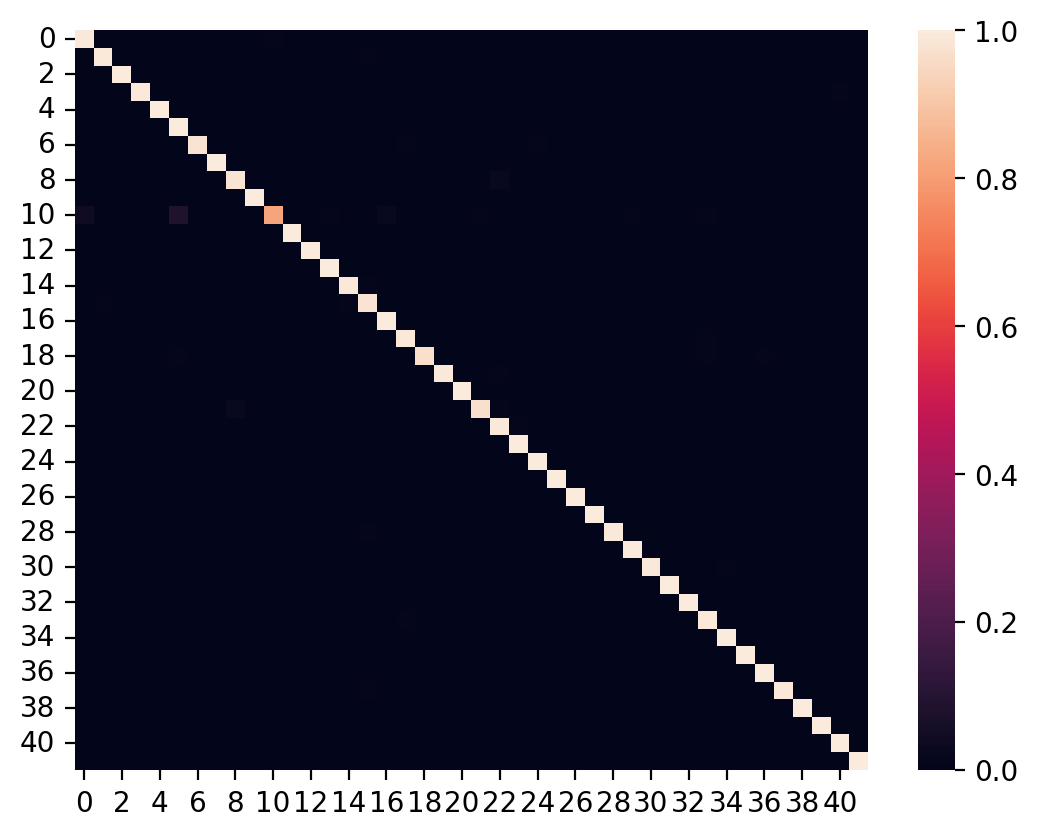

In [8]:
pred_proba = rf.predict_proba(X_test)
sns.heatmap(pred_proba)
plt.show()

## Save Models

In [9]:
joblib.dump(nb, 'models/naive_bayes.pkl')
joblib.dump(rf, 'models/random_forest.pkl')

['models/random_forest.pkl']

In [10]:
with open('data/SymptomList.txt', 'w', encoding='UTF-8') as out:
    for symp in train_data.columns:
        if symp == 'prognosis':
            break
        symp = symp.replace('_', ' ')
        symp = symp[0].upper() + symp[1:]
        out.write(symp)
        out.write('\n')